In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
reuters.load_data

<function keras.datasets.reuters.load_data(path='reuters.npz', num_words=None, skip_top=0, maxlen=None, test_split=0.2, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)>

In [3]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
x_train,x_val,y_train ,y_val = train_test_split(train_data,train_labels,
                                                test_size=0.25,
                                                random_state=2023)




In [4]:
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(x_val))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
2246
46


In [5]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results
x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)
y_val = utils.to_categorical(y_val)

In [6]:
train_data.shape
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [7]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [8]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(10000)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                        

In [11]:
print(x_train.shape)
print(y_train.shape)

(8982, 10000)
(8982, 46)


### 모델 학습
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [12]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('sequential', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=200,
                    validation_data=(x_test, y_test),
                    callbacks=[check_point_cb, early_stopping_cb])


Epoch 1/200
280/281 [============================>.] - ETA: 0s - loss: 1.6488 - accuracy: 0.6621

INFO:tensorflow:Assets written to: sequential\assets


INFO:tensorflow:Assets written to: sequential\assets


281/281 [==============================] - 12s 31ms/step - loss: 1.6481 - accuracy: 0.6622 - val_loss: 1.2004 - val_accuracy: 0.7622
Epoch 2/200
280/281 [============================>.] - ETA: 0s - loss: 0.7408 - accuracy: 0.8328

INFO:tensorflow:Assets written to: sequential\assets


INFO:tensorflow:Assets written to: sequential\assets


281/281 [==============================] - 9s 32ms/step - loss: 0.7412 - accuracy: 0.8328 - val_loss: 1.0218 - val_accuracy: 0.7850
Epoch 3/200
281/281 [==============================] - 5s 18ms/step - loss: 0.4707 - accuracy: 0.8927 - val_loss: 1.0370 - val_accuracy: 0.7992
Epoch 4/200
281/281 [==============================] - 5s 18ms/step - loss: 0.3328 - accuracy: 0.9224 - val_loss: 1.0844 - val_accuracy: 0.7925
Epoch 5/200
281/281 [==============================] - 5s 19ms/step - loss: 0.2579 - accuracy: 0.9348 - val_loss: 1.1622 - val_accuracy: 0.7992
Epoch 6/200
281/281 [==============================] - 5s 19ms/step - loss: 0.2180 - accuracy: 0.9433 - val_loss: 1.1600 - val_accuracy: 0.7943
Epoch 7/200
281/281 [==============================] - 5s 18ms/step - loss: 0.1936 - accuracy: 0.9478 - val_loss: 1.1701 - val_accuracy: 0.8050
Epoch 8/200
281/281 [==============================] - 4s 15ms/step - loss: 0.1830 - accuracy: 0.9482 - val_loss: 1.1888 - val_accuracy: 0.8005
Epoc

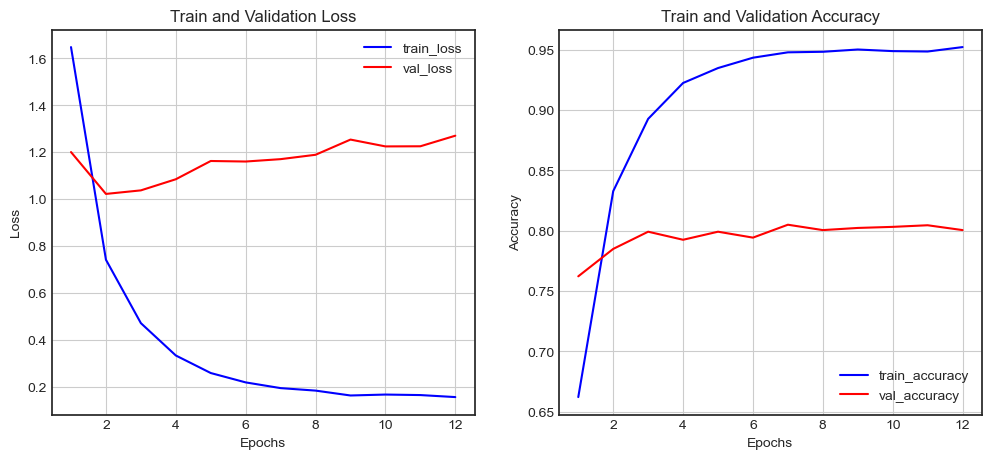

In [13]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [14]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(x_val, y_val)

71/71 [==============================] - 0s 4ms/step - loss: 0.3100 - accuracy: 0.9319


[0.31000852584838867, 0.931878924369812]

# 회고

* 개인적으로 시간이 오래걸렸던 문제였다.
원핫 인코딩에 대해서는 많이 다뤘던 주제였지만, 이것을 평가하고 검증데이터로 넣기 까지, 꽤나 오랜 시간이 걸렸다. 조원분들에게 물어보기도 하고, 새로 알게된 사실도 알게 되었는데.

> model.compile(loss='sparse_categorical_crossentropy') 이 부분이었다.
이 부분은 sparse_를 넣어서 문제가 됬었는데, 이 코드는 원핫 인코딩을 자동으로 넣는다는 코드여서 그렇게 애먹었던 것이었다.

>>  model.compile(loss='categorical_crossentropy')
이부분을 이렇게 바꾸니 원활히 제대로 평가가 되었다.


딥러닝에 대해 얕게나마, 알게되는 시간이었다.